## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [1]:
import random

In [2]:
# The actions available to each player
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is harcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the joint action is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [3]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<a id="best_response_with_inertia"></a>
## best_response_with_inertia

This function implements the best response with inertia algorithm.

* **day** int: the current day
* **player** String: the player making a decision


**returns** 

* **response** char: the utility that the player is responding with, either 'S' or 'H'

In [4]:
def best_response_with_inertia(day, player):
    if day == 0:
        rand = random.randint(0, 1)
        if player == "p1":
            return actions_P1[rand]
        else:
            return actions_P2[rand]
    else:
        rand = random.randint(1, 10)
        if player == "p1":
            if rand <= 8:
                oppAction = history_P2_action[len(history_P2_action) - 1]
                utilityS = get_utility(('S', oppAction))[0]
                utilityH = get_utility(('H', oppAction))[0]
                if utilityS > utilityH:
                    return 'S'
                elif utilityS < utilityH:
                    return 'H'
                else:
                    rand = random.randint(0, 1)
                    return actions_P1[rand]
            else:
                return history_P1_action[len(history_P1_action) - 1]
        else:
            if rand <= 8:
                oppAction = history_P1_action[len(history_P1_action) - 1]
                utilityS = get_utility((oppAction, 'S'))[1]
                utilityH = get_utility((oppAction, 'H'))[1]
                if utilityS > utilityH:
                    return 'S'
                elif utilityS < utilityH:
                    return 'H'
                else:
                    rand = random.randint(0, 1)
                    return actions_P2[rand]
            else:
                return history_P2_action[len(history_P2_action) - 1]

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [5]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        for day in range(num_days):
            action_P1 = best_response_with_inertia(day, "p1")
            action_P2 = best_response_with_inertia(day, "p2")
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [6]:
# Parameters
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	H	S
0	1	S	H
0	2	H	S
0	3	S	H
0	4	H	H
0	5	H	H
0	6	H	H
0	7	H	H
0	8	H	H
0	9	H	H
--------------------------
1	0	S	S
1	1	S	S
1	2	S	S
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	S	S
2	1	S	S
2	2	S	S
2	3	S	S
2	4	S	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	S	H
3	1	H	S
3	2	S	H
3	3	S	S
3	4	S	S
3	5	S	S
3	6	S	S
3	7	S	S
3	8	S	S
3	9	S	S
--------------------------
4	0	H	H
4	1	H	H
4	2	H	H
4	3	H	H
4	4	H	H
4	5	H	H
4	6	H	H
4	7	H	H
4	8	H	H
4	9	H	H
--------------------------
5	0	H	S
5	1	S	H
5	2	H	H
5	3	H	H
5	4	H	H
5	5	H	H
5	6	H	H
5	7	H	H
5	8	H	H
5	9	H	H
--------------------------
6	0	S	H
6	1	H	S
6	2	S	H
6	3	H	H
6	4	H	H
6	5	H	H
6	6	H	H
6	7	H	H
6	8	H	H
6	9	H	H
--------------------------
7	0	S	S
7	1	S	S
7	2	S	S
7	3	S	S
7	4	S	S
7	5	S	S
7	6	S	S
7	7	S	S
7	8	S	S
7	9	S	S
--------------------------
8	0	H	S
8	1	S	H
8	2	H	H
8	3	H	H
8	4	H	H
8	5	H	H
8	6	H	H
8	7	H	H
8	8	H	H
8	

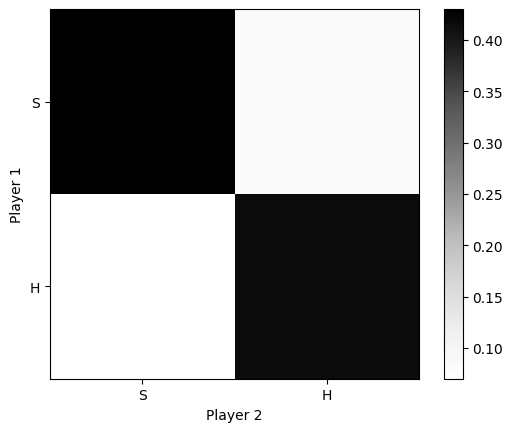

In [7]:
import numpy as np
import matplotlib.pyplot as plot

freq = np.zeros((2, 2))
for i in range(len(history_P1_action)):
    action_P1 = history_P1_action[i]
    action_P2 = history_P2_action[i]
    if action_P1 == 'S':
        row = 0
    else:
        row = 1
    if action_P2 == 'S':
        col = 0
    else:
        col = 1
    freq[row, col] += 1
prob = freq / np.sum(freq)
plot.imshow(prob, cmap='Greys', interpolation='nearest')
plot.colorbar()
plot.xticks([0, 1], ['S', 'H'])
plot.yticks([0, 1], ['S', 'H'])
plot.xlabel('Player 2')
plot.ylabel('Player 1')
plot.show()
